In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
current_path = os.getcwd()
parent_directory = os.path.dirname(current_path)
sys.path.append(parent_directory)
from Class.jenie import Jenie
import pandas as pd
import numpy as np
import scanpy as sc
import anndata
import umap.umap_ as umap
import leidenalg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import pairwise_distances
from scipy.stats import zscore
from matplotlib.colorbar import ColorbarBase
import matplotlib.colors as mcolors
from umap import UMAP
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ParameterGrid

In [3]:
xenium_scdata = sc.read_h5ad(r"D:\SMI-0214_DonCleveland_UCSD\SMI-0214_DonCleveland_UCSD\Xenium_mouse_filtered.h5ad")
xenium_scdata

AnnData object with n_obs × n_vars = 547139 × 248
    obs: 'cell_id', 'Sample ID', 'Number of genes', 'Number of transcripts', 'leiden', 'cluster_names', 'celltype'
    uns: 'Sample ID_colors', 'cell_id_colors', 'celltype_colors', 'cluster_names_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_raw', 'X_spatial', 'X_spatial_rescaled', 'X_spatial_rescaled_flipped', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [4]:
xenium_c24m2 = xenium_scdata[xenium_scdata.obs['Sample ID'] == 'C24m2']
xenium_c24m2

View of AnnData object with n_obs × n_vars = 54061 × 248
    obs: 'cell_id', 'Sample ID', 'Number of genes', 'Number of transcripts', 'leiden', 'cluster_names', 'celltype'
    uns: 'Sample ID_colors', 'cell_id_colors', 'celltype_colors', 'cluster_names_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_raw', 'X_spatial', 'X_spatial_rescaled', 'X_spatial_rescaled_flipped', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [5]:
cosmx_scdata = sc.read_h5ad(r"D:\SMI-0214_DonCleveland_UCSD\SMI-0214_DonCleveland_UCSD\Cosmx_mouse_filtered.h5ad")
cosmx_scdata

AnnData object with n_obs × n_vars = 132721 × 950
    obs: 'total_counts', 'leiden', 'celltype'
    var: 'mean', 'std'
    uns: 'celltype_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_raw', 'X_spatial', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [6]:
right_side_scdata = cosmx_scdata[cosmx_scdata.obsm['X_spatial'][:, 0] >= -445000]
right_side_scdata

View of AnnData object with n_obs × n_vars = 63477 × 950
    obs: 'total_counts', 'leiden', 'celltype'
    var: 'mean', 'std'
    uns: 'celltype_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_raw', 'X_spatial', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [7]:
hd_175_2_scdata = right_side_scdata[right_side_scdata.obsm['X_spatial'][:, 1] > 15000]
hd_175_2_scdata

View of AnnData object with n_obs × n_vars = 31027 × 950
    obs: 'total_counts', 'leiden', 'celltype'
    var: 'mean', 'std'
    uns: 'celltype_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_raw', 'X_spatial', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [8]:
cbm2_scdata = sc.read_h5ad(r"D:\SMI-0214_DonCleveland_UCSD\SMI-0214_DonCleveland_UCSD\Gellyfish Analysis\CBM2_new_immmature_dg.h5ad")
cbm2_scdata

AnnData object with n_obs × n_vars = 57489 × 223
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'leiden', 'Experiment', 'Age', 'Mouse', 'Section', 'Treatment', 'celltype', 'MERFISH celltype', 'general_celltype'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_spatial', 'X_umap'
    obsp: 'connectivities', 'distances'

In [9]:
var_names = xenium_c24m2.var_names.intersection(hd_175_2_scdata.var_names).intersection(cbm2_scdata.var_names)
var_names

Index(['Acta2', 'Aqp4', 'Bdnf', 'Calb1', 'Cldn5', 'Fos', 'Gad1', 'Gfap',
       'Gpr17', 'Npy2r', 'Pdgfra', 'Slit2', 'Vip'],
      dtype='object')

In [10]:
xenium_overlap_scdata = xenium_c24m2[:, var_names]
xenium_overlap_scdata

View of AnnData object with n_obs × n_vars = 54061 × 13
    obs: 'cell_id', 'Sample ID', 'Number of genes', 'Number of transcripts', 'leiden', 'cluster_names', 'celltype'
    uns: 'Sample ID_colors', 'cell_id_colors', 'celltype_colors', 'cluster_names_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_raw', 'X_spatial', 'X_spatial_rescaled', 'X_spatial_rescaled_flipped', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [11]:
cosmx_overlap_scdata = hd_175_2_scdata[:, var_names]
cosmx_overlap_scdata

View of AnnData object with n_obs × n_vars = 31027 × 13
    obs: 'total_counts', 'leiden', 'celltype'
    var: 'mean', 'std'
    uns: 'celltype_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_raw', 'X_spatial', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [12]:
cmb2_overlap_scdata = cbm2_scdata[:, var_names]
cmb2_overlap_scdata

View of AnnData object with n_obs × n_vars = 57489 × 13
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'leiden', 'Experiment', 'Age', 'Mouse', 'Section', 'Treatment', 'celltype', 'MERFISH celltype', 'general_celltype'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_spatial', 'X_umap'
    obsp: 'connectivities', 'distances'

In [13]:
sc.pp.pca(xenium_overlap_scdata)
sc.pp.neighbors(xenium_overlap_scdata)
sc.tl.umap(xenium_overlap_scdata)

C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\preprocessing\_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca
C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\sparse\_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [14]:
sc.tl.leiden(xenium_overlap_scdata, resolution = 0.5)

C:\Users\krist\AppData\Local\Temp\ipykernel_7400\3747359110.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(xenium_overlap_scdata, resolution = 0.5)


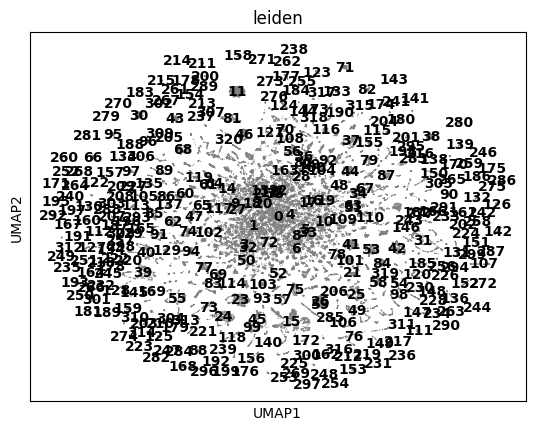

In [15]:
sc.pl.umap(xenium_overlap_scdata, color = 'leiden', legend_loc = 'on data')

In [16]:
list(xenium_overlap_scdata.obs['leiden'].value_counts())

[2582,
 1789,
 1734,
 1679,
 1576,
 1512,
 1482,
 1459,
 1458,
 1323,
 1090,
 1089,
 931,
 915,
 899,
 891,
 886,
 789,
 788,
 589,
 579,
 421,
 415,
 386,
 360,
 355,
 353,
 353,
 351,
 345,
 345,
 344,
 337,
 336,
 331,
 329,
 327,
 304,
 303,
 302,
 283,
 280,
 280,
 274,
 270,
 259,
 247,
 244,
 244,
 244,
 243,
 242,
 238,
 238,
 236,
 231,
 225,
 222,
 216,
 215,
 213,
 211,
 205,
 205,
 202,
 201,
 195,
 194,
 194,
 193,
 192,
 192,
 180,
 177,
 171,
 169,
 164,
 163,
 160,
 160,
 158,
 155,
 155,
 154,
 153,
 152,
 149,
 144,
 140,
 139,
 138,
 133,
 133,
 132,
 129,
 129,
 129,
 126,
 126,
 124,
 120,
 120,
 118,
 118,
 118,
 115,
 113,
 113,
 112,
 112,
 112,
 112,
 112,
 110,
 109,
 108,
 107,
 107,
 105,
 105,
 103,
 101,
 101,
 95,
 93,
 93,
 93,
 92,
 87,
 86,
 86,
 85,
 83,
 81,
 81,
 80,
 80,
 79,
 77,
 76,
 75,
 75,
 75,
 75,
 74,
 74,
 73,
 72,
 72,
 71,
 70,
 65,
 63,
 62,
 62,
 61,
 61,
 61,
 60,
 60,
 59,
 59,
 59,
 57,
 56,
 53,
 53,
 53,
 53,
 52,
 51,
 51,
 49,


In [49]:
cluster_sizes = xenium_overlap_scdata.obs['leiden'].value_counts()
cluster_sizes

0      2582
1      1789
2      1734
3      1679
4      1576
       ... 
310      15
308      15
318       9
319       8
320       5
Name: leiden, Length: 321, dtype: int64

In [50]:
small_clusters = cluster_sizes[cluster_sizes < 500].index
small_clusters

CategoricalIndex(['21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
                  ...
                  '315', '314', '309', '312', '311', '310', '308', '318',
                  '319', '320'],
                 categories=['0', '1', '2', '3', ..., '317', '318', '319', '320'], ordered=False, dtype='category', length=300)

In [51]:
mask = ~xenium_overlap_scdata.obs['leiden'].isin(small_clusters)
mask

212509     True
212510    False
212511     True
212512     True
212513     True
          ...  
266820     True
266821    False
266822     True
266823    False
266824     True
Name: leiden, Length: 54061, dtype: bool

In [52]:
xenium_overlap_scdata_filtered = xenium_overlap_scdata[mask]
xenium_overlap_scdata_filtered

View of AnnData object with n_obs × n_vars = 26040 × 13
    obs: 'cell_id', 'Sample ID', 'Number of genes', 'Number of transcripts', 'leiden', 'cluster_names', 'celltype'
    uns: 'Sample ID_colors', 'cell_id_colors', 'celltype_colors', 'cluster_names_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_raw', 'X_spatial', 'X_spatial_rescaled', 'X_spatial_rescaled_flipped', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

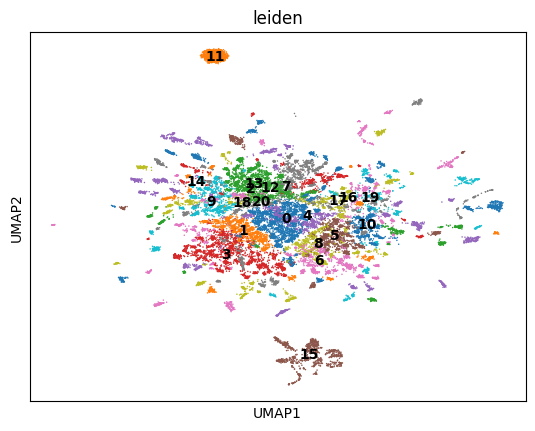

In [58]:
sc.pl.umap(xenium_overlap_scdata_filtered, color = 'leiden', palette = plt.rcParams["axes.prop_cycle"], legend_loc = 'on data')

In [54]:
xenium_overlap_scdata_filtered.obs['leiden'].value_counts()

0     2582
1     1789
2     1734
3     1679
4     1576
5     1512
6     1482
7     1459
8     1458
9     1323
10    1090
11    1089
12     931
13     915
14     899
15     891
16     886
17     789
18     788
19     589
20     579
Name: leiden, dtype: int64

In [24]:
sc.pp.pca(cosmx_overlap_scdata)
sc.pp.neighbors(cosmx_overlap_scdata)
sc.tl.umap(cosmx_overlap_scdata)

C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\preprocessing\_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca
C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\sparse\_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [25]:
sc.tl.leiden(cosmx_overlap_scdata, resolution = 0.5)

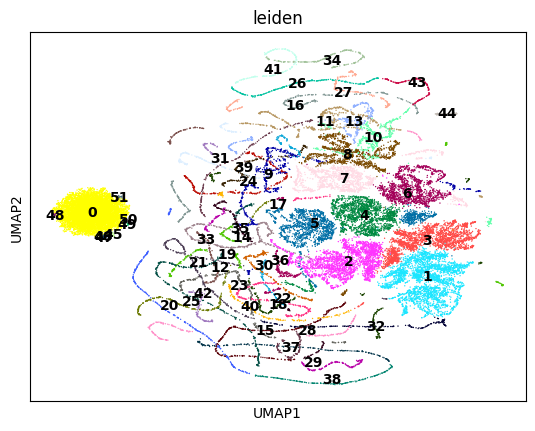

In [26]:
sc.pl.umap(cosmx_overlap_scdata, color = 'leiden', legend_loc = 'on data')

In [27]:
list(cosmx_overlap_scdata.obs['leiden'].value_counts())

[7682,
 2889,
 2272,
 2085,
 1814,
 1655,
 1562,
 1303,
 1079,
 572,
 523,
 430,
 327,
 325,
 304,
 296,
 293,
 279,
 276,
 256,
 251,
 248,
 239,
 234,
 222,
 219,
 216,
 207,
 202,
 202,
 191,
 189,
 187,
 186,
 180,
 178,
 176,
 169,
 169,
 167,
 166,
 161,
 159,
 132,
 46,
 16,
 16,
 16,
 16,
 15,
 15,
 15]

In [28]:
cluster_sizes = cosmx_overlap_scdata.obs['leiden'].value_counts()
small_clusters = cluster_sizes[cluster_sizes < 500].index
mask = ~cosmx_overlap_scdata.obs['leiden'].isin(small_clusters)
cosmx_overlap_scdata_filtered = cosmx_overlap_scdata[mask]

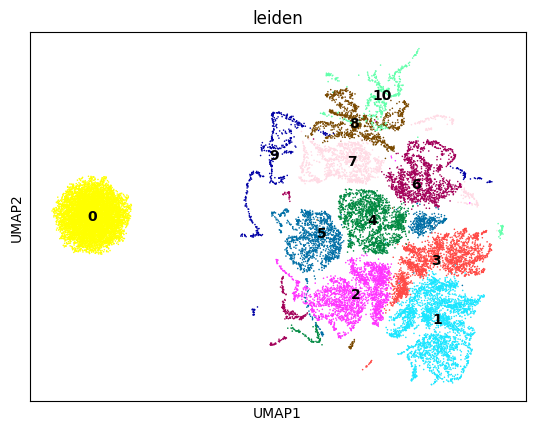

In [29]:
sc.pl.umap(cosmx_overlap_scdata_filtered, color = 'leiden', legend_loc = 'on data')

In [30]:
sc.pp.pca(cmb2_overlap_scdata)
sc.pp.neighbors(cmb2_overlap_scdata)
sc.tl.umap(cmb2_overlap_scdata)

C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\preprocessing\_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca
C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\sparse\_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [31]:
sc.tl.leiden(cmb2_overlap_scdata, resolution = 0.5)

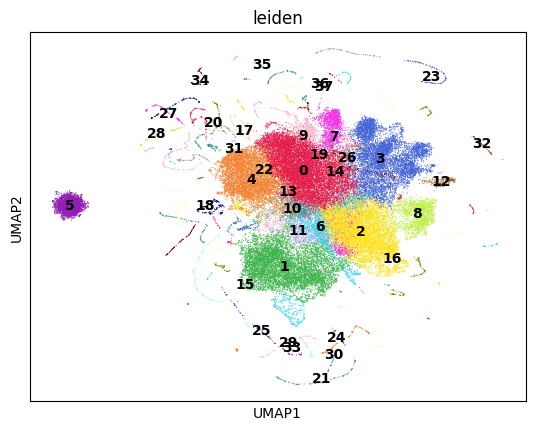

In [32]:
sc.pl.umap(cmb2_overlap_scdata, color = 'leiden', legend_loc = 'on data')

In [33]:
list(cmb2_overlap_scdata.obs['leiden'].value_counts())

[11554,
 7958,
 7660,
 7219,
 6835,
 2656,
 2633,
 2241,
 1971,
 1170,
 1154,
 895,
 332,
 316,
 282,
 263,
 260,
 208,
 201,
 199,
 194,
 125,
 109,
 108,
 103,
 101,
 100,
 85,
 78,
 76,
 67,
 62,
 60,
 60,
 59,
 43,
 27,
 25]

In [34]:
cluster_sizes = cmb2_overlap_scdata.obs['leiden'].value_counts()
small_clusters = cluster_sizes[cluster_sizes < 500].index
mask = ~cmb2_overlap_scdata.obs['leiden'].isin(small_clusters)
cbm2_overlap_scdata_filtered = cmb2_overlap_scdata[mask]

C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\plotting\_utils.py:465: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


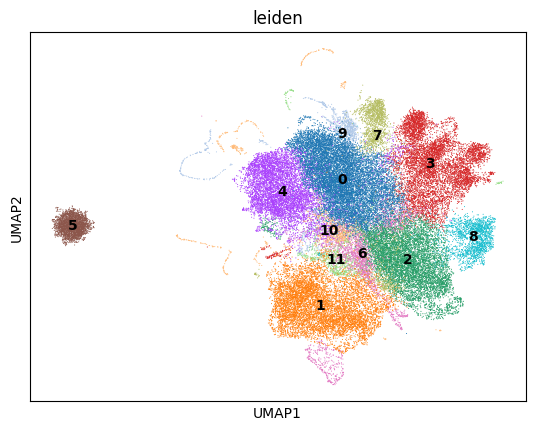

In [35]:
sc.pl.umap(cbm2_overlap_scdata_filtered, color = 'leiden', legend_loc = 'on data')